## Neural Networks Homework 6 

### Mustafa Nazlıer - 15050111035


### The analysis and the comments for the experiments resides after the experiments

In [ ]:
# check version
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from tensorflow.keras.datasets import cifar10           #importing cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense   # importing layers that we are probably going to use

import tensorflow_hub as hub            #tensor hub 
from tensorflow.keras.layers.experimental.preprocessing import Resizing   # importing Resizing layer for a better optimized resizing 



In [ ]:
(train_images, train_labels), (X_test, y_test) = cifar10.load_data()
X_test = X_test / 255.0

X_train_small, X_valid_small = train_images[:1000], train_images[1000:2000]
y_train_small, y_valid_small = train_labels[:1000], train_labels[1000:2000]
X_train_small = X_train_small / 255.0
X_valid_small = X_valid_small / 255.0

X_train_moderate, X_valid_moderate = train_images[:5000], train_images[5000:10000]         # Creating the small, moderately sized and the large dataset with the given dimensions
y_train_moderate, y_valid_moderate = train_labels[:5000], train_labels[5000:10000]
X_train_moderate = X_train_moderate / 255.0
X_valid_moderate = X_valid_moderate / 255.0

X_train_large, X_valid_large = train_images[:30000], train_images[:20000]
y_train_large, y_valid_large = train_labels[:30000], train_labels[:20000]
X_train_large = X_train_large / 255.0
X_valid_large = X_valid_large / 255.0


170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
print('Small Dataset')
print('Train      : ', X_train_small.shape)
print('Validation : ', X_valid_small.shape)
print('Test       : ', X_test.shape)

print('Moderate size Dataset')
print('Train      : ', X_train_moderate.shape)
print('Validation : ', X_valid_moderate.shape)             #Shapes of the three dataset that we have created
print('Test       : ', X_test.shape)

print('Large  Dataset')
print('Train      : ', X_train_large.shape)
print('Validation : ', X_valid_large.shape)
print('Test       : ', X_test.shape)

Small Dataset
Train      :  (1000, 32, 32, 3)
Validation :  (1000, 32, 32, 3)
Test       :  (10000, 32, 32, 3)
Moderate size Dataset
Train      :  (5000, 32, 32, 3)
Validation :  (5000, 32, 32, 3)
Test       :  (10000, 32, 32, 3)
Large  Dataset
Train      :  (30000, 32, 32, 3)
Validation :  (20000, 32, 32, 3)
Test       :  (10000, 32, 32, 3)


# Transfer Learning Experiments

## SMALL DATASET

### Training from scratch

In [ ]:


TL_model = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5" , input_shape=(224, 224, 3), trainable=True)

])
TL_model.build([None, 224, 224 , 3])

In [ ]:
TL_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1001)              6633209   
Total params: 6,633,209
Trainable params: 6,618,649
Non-trainable params: 14,560
_________________________________________________________________


In [ ]:
TL_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model.fit(X_train_small, y_train_small, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_small, y_valid_small))

Epoch 1/10
32/32 [==============================] - 53s 466ms/step - loss: 2.2433 - accuracy: 0.5100 - val_loss: 11.4123 - val_accuracy: 0.1730
Epoch 2/10
32/32 [==============================] - 12s 384ms/step - loss: 0.9952 - accuracy: 0.7420 - val_loss: 5.1768 - val_accuracy: 0.3330
Epoch 3/10
32/32 [==============================] - 12s 385ms/step - loss: 0.6172 - accuracy: 0.8700 - val_loss: 2.8819 - val_accuracy: 0.4670
Epoch 4/10
32/32 [==============================] - 12s 385ms/step - loss: 0.7447 - accuracy: 0.8380 - val_loss: 2.7248 - val_accuracy: 0.4610
Epoch 5/10
32/32 [==============================] - 12s 385ms/step - loss: 0.6265 - accuracy: 0.8760 - val_loss: 2.4985 - val_accuracy: 0.5260
Epoch 6/10
32/32 [==============================] - 12s 386ms/step - loss: 0.4705 - accuracy: 0.9230 - val_loss: 3.6546 - val_accuracy: 0.4430
Epoch 7/10
32/32 [==============================] - 12s 385ms/step - loss: 0.4169 - accuracy: 0.9400 - val_loss: 2.6613 - val_accuracy: 0.482

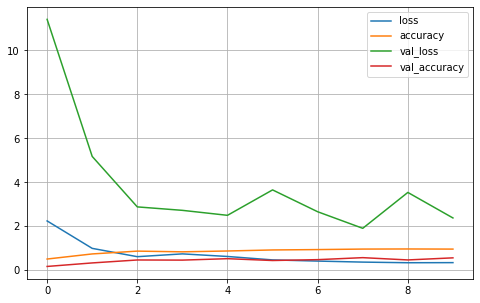

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = TL_model.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.5753999948501587


### Removing the output layer and freezing the inception_v3 layers and training only the resizing and output layer that we have added

In [ ]:
TL_model1 = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4" , input_shape=(224, 224, 3), trainable=False),
       tf.keras.layers.Dense(10, activation='softmax')
])
TL_model1.build([None, 224, 224 , 3])





In [ ]:
TL_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_1 (Resizing)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
TL_model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model1.fit(X_train_small, y_train_small, epochs=numberOfEpochs,  validation_data=(X_valid_small, y_valid_small))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


32/32 [==============================] - 19s 381ms/step - loss: 1.5009 - accuracy: 0.5000 - val_loss: 0.8758 - val_accuracy: 0.7360
Epoch 2/10
32/32 [==============================] - 10s 322ms/step - loss: 0.6113 - accuracy: 0.8220 - val_loss: 0.6487 - val_accuracy: 0.7930
Epoch 3/10
32/32 [==============================] - 10s 321ms/step - loss: 0.4415 - accuracy: 0.8690 - val_loss: 0.6363 - val_accuracy: 0.7870
Epoch 4/10
32/32 [==============================] - 10s 322ms/step - loss: 0.3459 - accuracy: 0.9040 - val_loss: 0.5695 - val_accuracy: 0.8090
Epoch 5/10
32/32 [==============================] - 10s 322ms/step - loss: 0.2740 - accuracy: 0.9230 - val_loss: 0.5543 - val_accuracy: 0.8160
Epoch 6/10
32/32 [==============================] - 10s 321ms/step - loss: 0.2159 - accuracy: 0.9540 - val_loss: 0.5281 - val_accuracy: 0.8250
Epoch 7/10
32/32 [==============================] - 10s 321ms/step - loss: 0.1759 - accuracy: 0.9660 - val_loss: 0.5169 - val_accuracy: 0.8280
Epoch 8/10

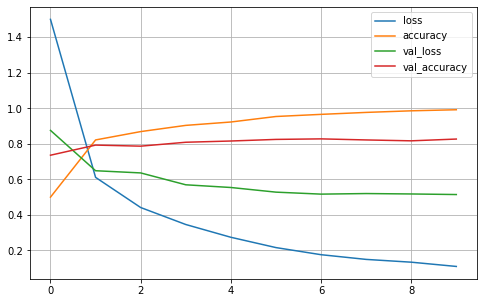

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = TL_model1.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8136000037193298


### Removing the output layer and training the whole network with the added output layer of our selection

In [ ]:
TL_model2 = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4" , input_shape=(224, 224, 3), trainable=True),
       tf.keras.layers.Dense(10, activation='softmax')
])
TL_model2.build([None, 224, 224 , 3])


In [ ]:
TL_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_2 (Resizing)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 21,823,274
Trainable params: 21,788,842
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
TL_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model2.fit(X_train_small, y_train_small, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_small, y_valid_small))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


32/32 [==============================] - 39s 821ms/step - loss: 1.9207 - accuracy: 0.4730 - val_loss: 288.1374 - val_accuracy: 0.1070
Epoch 2/10
32/32 [==============================] - 24s 747ms/step - loss: 1.4770 - accuracy: 0.5950 - val_loss: 66.2995 - val_accuracy: 0.0870
Epoch 3/10
32/32 [==============================] - 24s 746ms/step - loss: 1.0132 - accuracy: 0.7570 - val_loss: 4.6250 - val_accuracy: 0.2630
Epoch 4/10
32/32 [==============================] - 24s 744ms/step - loss: 0.7596 - accuracy: 0.8510 - val_loss: 4.0061 - val_accuracy: 0.3400
Epoch 5/10
32/32 [==============================] - 24s 747ms/step - loss: 0.7333 - accuracy: 0.8410 - val_loss: 5.0630 - val_accuracy: 0.2780
Epoch 6/10
32/32 [==============================] - 24s 745ms/step - loss: 0.5682 - accuracy: 0.8910 - val_loss: 1.9486 - val_accuracy: 0.5180
Epoch 7/10
32/32 [==============================] - 24s 746ms/step - loss: 0.5050 - accuracy: 0.9250 - val_loss: 2.8064 - val_accuracy: 0.4570
Epoch 8

In [ ]:
test_loss, test_acc = TL_model2.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.3799999952316284


## MODERATELY SIZED DATASET

### Training from scratch

In [ ]:
TL_model = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5" , input_shape=(224, 224, 3), trainable=True)

])
TL_model.build([None, 224, 224 , 3])
TL_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model.fit(X_train_moderate, y_train_moderate, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_moderate, y_valid_moderate))

Epoch 1/10
157/157 [==============================] - 69s 392ms/step - loss: 1.4139 - accuracy: 0.6474 - val_loss: 1.5704 - val_accuracy: 0.6380
Epoch 2/10
157/157 [==============================] - 61s 388ms/step - loss: 0.8268 - accuracy: 0.8044 - val_loss: 1.7638 - val_accuracy: 0.5764
Epoch 3/10
157/157 [==============================] - 68s 432ms/step - loss: 0.6778 - accuracy: 0.8476 - val_loss: 1.6388 - val_accuracy: 0.6528
Epoch 4/10
157/157 [==============================] - 61s 387ms/step - loss: 0.6084 - accuracy: 0.8722 - val_loss: 1.0668 - val_accuracy: 0.7410
Epoch 5/10
157/157 [==============================] - 61s 388ms/step - loss: 0.4866 - accuracy: 0.9086 - val_loss: 1.5921 - val_accuracy: 0.6460
Epoch 6/10
157/157 [==============================] - 61s 387ms/step - loss: 0.4934 - accuracy: 0.9144 - val_loss: 0.9683 - val_accuracy: 0.7806
Epoch 7/10
157/157 [==============================] - 61s 387ms/step - loss: 0.3873 - accuracy: 0.9456 - val_loss: 1.2726 - val_ac

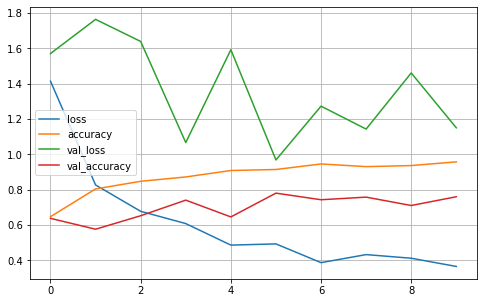

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = TL_model.evaluate(X_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.753000020980835


### Removing the output layer and training just the output layer (also including Resizing layer) 

In [ ]:
TL_model1 = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4" , input_shape=(224, 224, 3), trainable=False),
       tf.keras.layers.Dense(10, activation='softmax')
])
TL_model1.build([None, 224, 224 , 3])
TL_model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model1.fit(X_train_moderate, y_train_moderate, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_moderate, y_valid_moderate))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


157/157 [==============================] - 57s 326ms/step - loss: 0.7734 - accuracy: 0.7520 - val_loss: 0.5441 - val_accuracy: 0.8156
Epoch 2/10
157/157 [==============================] - 50s 321ms/step - loss: 0.4230 - accuracy: 0.8590 - val_loss: 0.5009 - val_accuracy: 0.8304
Epoch 3/10
157/157 [==============================] - 50s 321ms/step - loss: 0.3374 - accuracy: 0.8856 - val_loss: 0.4717 - val_accuracy: 0.8414
Epoch 4/10
157/157 [==============================] - 50s 321ms/step - loss: 0.2813 - accuracy: 0.9080 - val_loss: 0.4971 - val_accuracy: 0.8306
Epoch 5/10
157/157 [==============================] - 50s 321ms/step - loss: 0.2373 - accuracy: 0.9216 - val_loss: 0.4853 - val_accuracy: 0.8374
Epoch 6/10
157/157 [==============================] - 50s 321ms/step - loss: 0.2100 - accuracy: 0.9306 - val_loss: 0.4700 - val_accuracy: 0.8440
Epoch 7/10
157/157 [==============================] - 50s 320ms/step - loss: 0.1823 - accuracy: 0.9436 - val_loss: 0.5038 - val_accuracy: 0.8

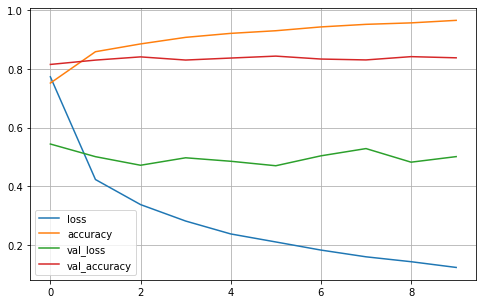

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = TL_model1.evaluate(X_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8353999853134155


### Removing the output layer and training the whole network with the our own output layer and resizing layer

In [ ]:
TL_model2 = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4" , input_shape=(224, 224, 3), trainable=True),
       tf.keras.layers.Dense(10, activation='softmax')
])
TL_model2.build([None, 224, 224 , 3])
TL_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model2.fit(X_train_moderate, y_train_moderate, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_moderate, y_valid_moderate))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


157/157 [==============================] - 130s 760ms/step - loss: 1.4326 - accuracy: 0.6084 - val_loss: 3.5242 - val_accuracy: 0.2804
Epoch 2/10
157/157 [==============================] - 118s 753ms/step - loss: 0.9457 - accuracy: 0.7722 - val_loss: 1.5237 - val_accuracy: 0.6224
Epoch 3/10
157/157 [==============================] - 118s 753ms/step - loss: 0.8363 - accuracy: 0.8100 - val_loss: 2.6054 - val_accuracy: 0.5048
Epoch 4/10
157/157 [==============================] - 118s 753ms/step - loss: 0.6761 - accuracy: 0.8636 - val_loss: 1.4284 - val_accuracy: 0.6588
Epoch 5/10
157/157 [==============================] - 134s 853ms/step - loss: 0.6032 - accuracy: 0.8934 - val_loss: 1.5323 - val_accuracy: 0.6548
Epoch 6/10
157/157 [==============================] - 118s 754ms/step - loss: 0.6140 - accuracy: 0.8888 - val_loss: 1.7573 - val_accuracy: 0.6510
Epoch 7/10
157/157 [==============================] - 118s 753ms/step - loss: 0.5394 - accuracy: 0.9128 - val_loss: 1.8290 - val_accura

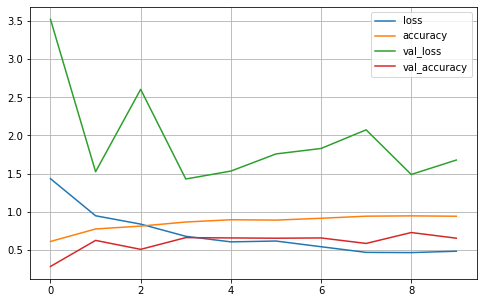

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = TL_model2.evaluate(X_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.6570000052452087


## LARGE DATASET

### Training from scratch

In [ ]:
TL_model = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5" , input_shape=(224, 224, 3), trainable=True)

])
TL_model.build([None, 224, 224 , 3])
TL_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model.fit(X_train_large, y_train_large, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_large, y_valid_large))

Epoch 1/10
938/938 [==============================] - 345s 360ms/step - loss: 0.9372 - accuracy: 0.7692 - val_loss: 1.1417 - val_accuracy: 0.7025
Epoch 2/10
938/938 [==============================] - 364s 389ms/step - loss: 0.6748 - accuracy: 0.8478 - val_loss: 0.6958 - val_accuracy: 0.8476
Epoch 3/10
938/938 [==============================] - 335s 357ms/step - loss: 0.6093 - accuracy: 0.8743 - val_loss: 0.6512 - val_accuracy: 0.8582
Epoch 4/10
938/938 [==============================] - 364s 389ms/step - loss: 0.5756 - accuracy: 0.8917 - val_loss: 0.6502 - val_accuracy: 0.8741
Epoch 5/10
938/938 [==============================] - 335s 357ms/step - loss: 0.5638 - accuracy: 0.9050 - val_loss: 0.6178 - val_accuracy: 0.8907
Epoch 6/10
938/938 [==============================] - 335s 357ms/step - loss: 0.5456 - accuracy: 0.9169 - val_loss: 0.5794 - val_accuracy: 0.9076
Epoch 7/10
938/938 [==============================] - 364s 389ms/step - loss: 0.5385 - accuracy: 0.9236 - val_loss: 0.5767 -

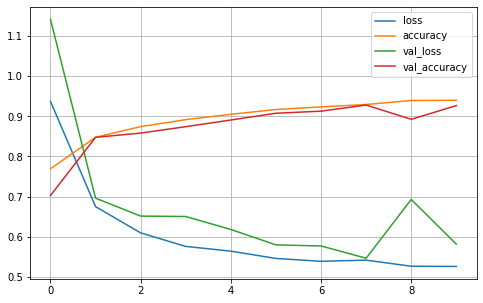

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = TL_model.evaluate(X_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8486999869346619


### Removing the output layer and training just the output layer (also including Resizing layer)

In [ ]:
TL_model1 = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4" , input_shape=(224, 224, 3), trainable=False),
       tf.keras.layers.Dense(10, activation='softmax')
])
TL_model1.build([None, 224, 224 , 3])
TL_model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model1.fit(X_train_large, y_train_large, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_large, y_valid_large))

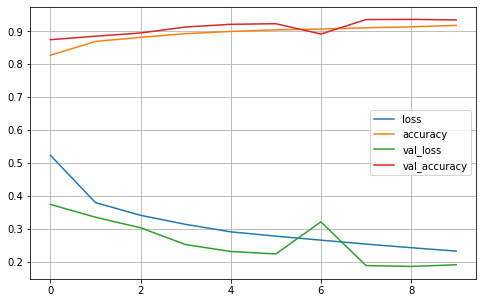

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = TL_model1.evaluate(X_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)

### Removing the output layer and training the whole network with the our own output layer and resizing layer

In [ ]:
TL_model2 = tf.keras.Sequential([
        Resizing(224,224),
       hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4" , input_shape=(224, 224, 3), trainable=True),
       tf.keras.layers.Dense(10, activation='softmax')
])
TL_model2.build([None, 224, 224 , 3])
TL_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [ ]:
import timeit

numberOfEpochs = 10
%time h = TL_model2.fit(X_train_large, y_train_large, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_large, y_valid_large))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


938/938 [==============================] - 670s 703ms/step - loss: 1.0388 - accuracy: 0.7372 - val_loss: 0.9326 - val_accuracy: 0.7829
Epoch 2/10
938/938 [==============================] - 656s 700ms/step - loss: 0.7676 - accuracy: 0.8365 - val_loss: 1.0044 - val_accuracy: 0.7742
Epoch 3/10
938/938 [==============================] - 656s 700ms/step - loss: 0.6959 - accuracy: 0.8689 - val_loss: 0.6933 - val_accuracy: 0.8741
Epoch 4/10
938/938 [==============================] - 698s 745ms/step - loss: 0.6674 - accuracy: 0.8840 - val_loss: 3.3937 - val_accuracy: 0.7905
Epoch 5/10
938/938 [==============================] - 656s 699ms/step - loss: 0.6536 - accuracy: 0.9005 - val_loss: 0.6844 - val_accuracy: 0.8934
Epoch 6/10
938/938 [==============================] - 697s 744ms/step - loss: 0.6660 - accuracy: 0.9065 - val_loss: 1.0214 - val_accuracy: 0.8622
Epoch 7/10
938/938 [==============================] - 656s 699ms/step - loss: 0.6397 - accuracy: 0.9201 - val_loss: 0.6417 - val_accura

In [ ]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_acc = TL_model2.evaluate(X_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)

# ANALYSIS AND COMMENTS FOR THE TRANSFER LEARNING EXPERIMENTS

**In the regard of accuracy:** For all the datasets (small, moderate and large), the most successfull outcome is achieved while using the method "Removing the output layer and training just the output layer that we have added (also including Resizing layer)". The most certain reason for this outcome is that training tends to overfit when we train the transferred layers. The second most succesfull one happened to be the method "Training from scratch" that is when we get the whole network from Tensor Hub and train it. I believe the reason why 
it is better than changing the output layer is we have to think Neural Networks as a whole, each choice of layer adds something little to the whole design and I believe there are some overall rules that we should follow while optimizing a network for a distinct problem, so changing the output layer with just tf.keras.layers.Dense(10, activation='softmax') made things worse


**In the regard of efficiency**: It is for sure that the training time is affected by the overall complexity of the layers that we have chosen to train. When we train the whole network instead of training just the output layer, the parameter size is much much more and this basically results with countless hours of training. If better performance was achieveable just by training, that is okay but in our case/experiments, it was not cost-effective at all considering the accuracy levels. Also the overfitting is a problem when we think about the moderate/large datasets. The most efficient method was also freezing the transferred layer and training just the output layer(inc. Resizing) 

**In the regard of simplicity:** All of the methods were easy to use and we have to mention that the TensorHub and all the features of it (ex. using an already trained network or features) are really a gamechanger when we consider the availability and the simplicity of the system